In [24]:
# import the libraries as shown below

import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [25]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

# # Storing the path of training and testing dataset
# train_path = 'cell_images/Train'
# valid_path = 'cell_images/Test'

In [26]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [27]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [28]:
# # useful for getting number of output classes
# folders = glob('../input/malaria-dataset/Dataset/Train/*')

In [29]:
# useful for getting number of output classes
folders = glob('../input/cell-images-for-detecting-malaria/cell_images/*')

In [30]:
folders = folders[:2]
folders

['../input/cell-images-for-detecting-malaria/cell_images/Uninfected',
 '../input/cell-images-for-detecting-malaria/cell_images/Parasitized']

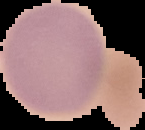

In [31]:
img = Image. open("../input/malaria-dataset/Dataset/Test/Uninfected/2.png")
img

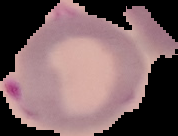

In [32]:
img = Image. open("../input/malaria-dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_15.png")
img

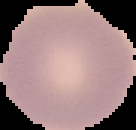

In [33]:
img = Image. open("../input/malaria-dataset/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_191.png")
img

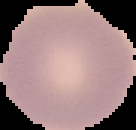

In [34]:
img = Image. open("../input/malaria-dataset/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_191.png")
img

In [35]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [36]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [37]:
# # view the structure of the model
# model.summary()

In [38]:
# Create Model from model using CNN
# This is custom model using CNN we can use this model instead of VGG9 we if we want
# Accuracy might differ in both the model.


# model=Sequential()
# model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(500,activation="relu"))
# model.add(Dense(2,activation="softmax"))
# model.summary()

In [39]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [40]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('../input/cell-images-for-detecting-malaria/cell_images/cell_images',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 27558 images belonging to 2 classes.


In [42]:
test_set = test_datagen.flow_from_directory('../input/malaria-dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [43]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=20,
  validation_steps=len(test_set)
)

Epoch 1/10
20/20 [==============================] - 16s 729ms/step - loss: 1.3010 - accuracy: 0.5312 - val_loss: 0.9089 - val_accuracy: 0.4552
Epoch 2/10
20/20 [==============================] - 11s 534ms/step - loss: 0.5919 - accuracy: 0.7094 - val_loss: 0.4932 - val_accuracy: 0.7388
Epoch 3/10
20/20 [==============================] - 12s 569ms/step - loss: 0.4883 - accuracy: 0.7953 - val_loss: 0.4561 - val_accuracy: 0.7985
Epoch 4/10
20/20 [==============================] - 11s 560ms/step - loss: 0.4886 - accuracy: 0.7656 - val_loss: 0.5607 - val_accuracy: 0.6791
Epoch 5/10
20/20 [==============================] - 11s 534ms/step - loss: 0.4625 - accuracy: 0.7859 - val_loss: 0.4261 - val_accuracy: 0.8134
Epoch 6/10
20/20 [==============================] - 9s 426ms/step - loss: 0.4212 - accuracy: 0.7866 - val_loss: 0.4847 - val_accuracy: 0.7537
Epoch 7/10
20/20 [==============================] - 9s 447ms/step - loss: 0.4120 - accuracy: 0.8188 - val_loss: 0.3312 - val_accuracy: 0.8507
E

In [44]:
training_set.class_indices

{'Parasitized': 0, 'Uninfected': 1}

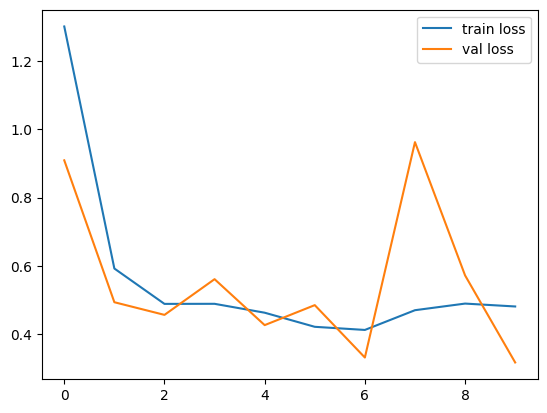

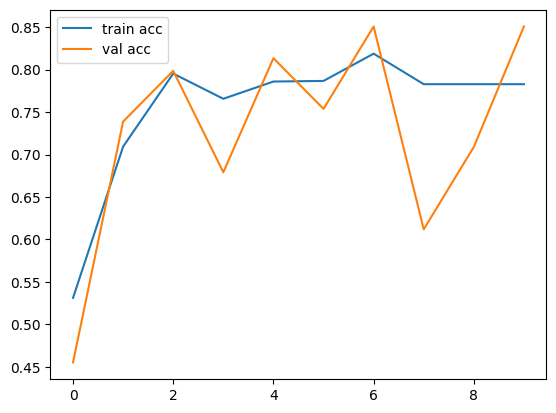

<Figure size 640x480 with 0 Axes>

In [45]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [46]:
# saving our model as h5 file to we can use it later if we want

# model.save('model_vgg19.h5')

In [47]:
# import tensorflow as tf
# tf.keras.utils.plot_model(
#     model, to_file='model.png', show_shapes=True)

# Optional (Testing our Model)

In [48]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 136ms/step


In [49]:
# print(y_pred)

In [50]:
y_pred = np.argmax(y_pred, axis=1)

In [51]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1])

In [52]:
# loading the model

# model=load_model('./model_vgg19.h5')

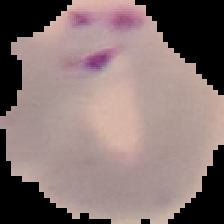

In [53]:
# Taking random image and will see what our model predicts.

img=image.load_img('../input/malaria-dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105803_cell_108.png',target_size=(224,224))
img

In [54]:
x=image.img_to_array(img)
# print(x)

In [55]:
x.shape

(224, 224, 3)

In [56]:
x=x/255

In [57]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [58]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[1.739878e-05, 9.999826e-01]], dtype=float32)

In [59]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 18ms/step


In [60]:
a

array([1])

In [61]:
test_set.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [62]:
# Where we will get to know what label our model has predicted
# If label is 1 then it means Uninfected
# If label is 0 then it means Infected

if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
